<a href="https://colab.research.google.com/github/LoreJob/DeepFake-Dct/blob/main/Copy_of_TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
!git clone https://github.com/LoreJob/DeepFake-Dct.git

fatal: destination path 'DeepFake-Dct' already exists and is not an empty directory.


In [ ]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
data_dir = "/content/DeepFake-Dct/dataset big"

In [ ]:
os.listdir(data_dir)

['Validation', 'Test', 'Train']

In [ ]:
print(len( os.listdir((os.path.join(data_dir,'Train','Real')))))
print(len( os.listdir((os.path.join(data_dir,'Train','Fake')))))

70001
70001


In [ ]:
for image_class in os.listdir((os.path.join(data_dir,'Train','Real'))):
  print(image_class)
  break

real_23748.jpg


In [ ]:
img = cv2.imread(os.path.join(data_dir,'Train','Real','real_0.jpg'))

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(256, 256, 3)

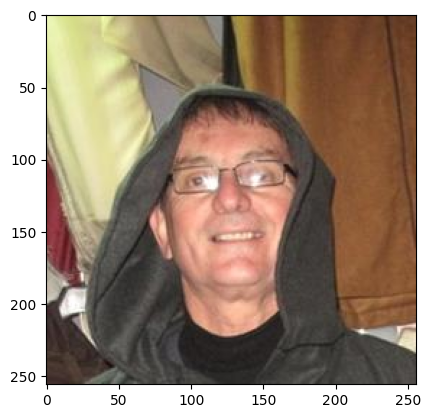

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
data_direct = "/content/DeepFake-Dct/dataset big/Train"
data = tf.keras.utils.image_dataset_from_directory(data_direct)

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

print(len(batch))

Found 140002 files belonging to 2 classes.
2


In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

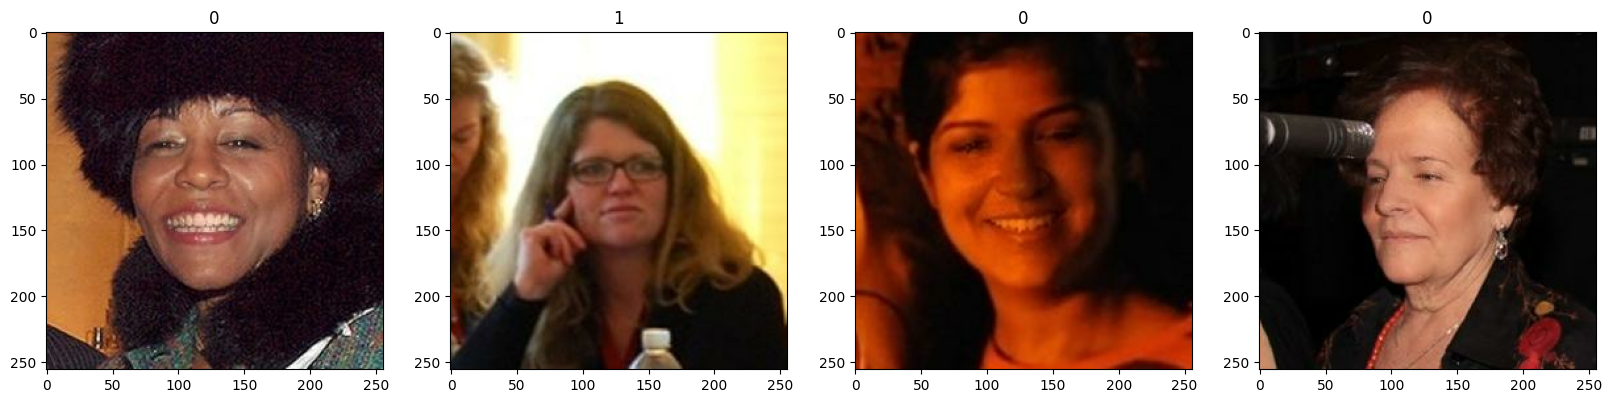

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# data = data.map(lambda x,y: (x/255,y))

In [ ]:
# scaled_iterator = data.as_numpy_iterator()
# scaled_iterator

In [ ]:
# batch = scaled_iterator.next()

In [ ]:
#len(data)

In [ ]:
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.2)
# test_size = int(len(data)*.1)

# train_size + val_size + test_size

In [ ]:
# train = data.take(train_size)
# val = data.skip(train_size).take(val_size)
# test = data.skip(train_size + val_size).take(test_size)

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    data_direct,
    image_size=(256, 256),
    batch_size=32,
    seed=123
)

Found 140002 files belonging to 2 classes.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
    "/content/DeepFake-Dct/dataset big/Validation",
    image_size=(256, 256),
    batch_size=32,
    seed=123
)

Found 39428 files belonging to 2 classes.


In [ ]:
train_data = tf.data.Dataset.from_tensor_slices().batch(32)

TypeError: DatasetV2.from_tensor_slices() missing 1 required positional argument: 'tensors'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Initialize empty lists to store images and labels
images = []
labels = []

# Iterate over the dataset and collect images and labels
for image_batch, label_batch in train_data:
    images.append(image_batch.numpy())
    labels.append(label_batch.numpy())

# Concatenate the lists into NumPy arrays
images = np.concatenate(images, axis=0)
labels = np.concatenate(labels, axis=0)

# Now you can fit the ImageDataGenerator
datagen.fit(images)

KeyboardInterrupt: 

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
data = data.prefetch(buffer_size=AUTOTUNE)
val_data = val_data.prefetch(buffer_size=AUTOTUNE)

In [ ]:
model.summary()

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Rescaling layer
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001
)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Dropout layer with 25% rate
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001
)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Dropout layer with 25% rate
    layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001
)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),  # Dropout layer with 25% rate
    layers.Conv2D(256, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001
)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001
)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

# tf.losses.BinaryCrossentropy()

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)]
)

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    "/content/DeepFake-Dct/dataset big/Test",
    image_size=(256, 256),  # Adjust size based on your needs
    batch_size=32,          # Adjust batch size based on your memory
    seed=123                # Seed for reproducibility
)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
test_data = test_data.prefetch(buffer_size=AUTOTUNE)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
import seaborn as sns

class_labels = ['Real', 'Fake']


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()